In [50]:
#READ DATASET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

fire_data = pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")


In [51]:
# SIZE OF DATA
fire_data.shape

(17442, 7)

In [52]:
fire_data.duplicated().any()

False

In [53]:
fire_data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [54]:
# DESCRIPTION OF EACH ATTRIBUTE OF THE DATASET
fire_data.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [55]:
kerosene = []
gasoline = []
lpg = []
thinner = []

dic = {1: 7, 2: 12, 3: 14, 4:16, 5:20, 6:1, 7:2}

for index, row in fire_data.iterrows():
    if(row['FUEL']) == 'kerosene':
      kerosene.append(dic.get(row['SIZE']))
      gasoline.append(0)
      lpg.append(0)
      thinner.append(0)
    if(row['FUEL']) == 'gasoline':
      kerosene.append(0)
      gasoline.append(dic.get(row['SIZE']))
      lpg.append(0)
      thinner.append(0)
    if(row['FUEL']) == 'thinner':
      kerosene.append(0)
      gasoline.append(0)
      lpg.append(0)
      thinner.append(dic.get(row['SIZE']))
    if(row['FUEL']) == 'lpg':
      kerosene.append(0)
      gasoline.append(0)
      lpg.append(dic.get(row['SIZE']))
      thinner.append(0)

In [56]:
fire_data['KEROSENE'] = kerosene
fire_data['GASOLINE'] = gasoline
fire_data['THINNER'] = thinner
fire_data['LPG'] = lpg
fire_data = fire_data.drop(['FUEL'], axis=1)
fire_data = fire_data.drop(['SIZE'], axis=1)

In [57]:
# TYPES
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTANCE   17442 non-null  int64  
 1   DESIBEL    17442 non-null  int64  
 2   AIRFLOW    17442 non-null  float64
 3   FREQUENCY  17442 non-null  int64  
 4   STATUS     17442 non-null  int64  
 5   KEROSENE   17442 non-null  int64  
 6   GASOLINE   17442 non-null  int64  
 7   THINNER    17442 non-null  int64  
 8   LPG        17442 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.2 MB


In [58]:
# FIRST ROWS EXAMPLE
fire_data.head()

,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,KEROSENE,GASOLINE,THINNER,LPG
0,10,96,0.0,75,0,0,7,0,0
1,10,96,0.0,72,1,0,7,0,0
2,10,96,2.6,70,1,0,7,0,0
3,10,96,3.2,68,1,0,7,0,0
4,10,109,4.5,67,1,0,7,0,0


In [59]:
# ANALYSE DATA
fire_data.describe()

,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,KEROSENE,GASOLINE,THINNER,LPG
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,100.000000,96.379142,6.975634,31.611111,0.497821,4.058824,4.058824,4.058824,0.176471
std,54.773826,8.164096,4.736169,20.939149,0.500010,6.708138,6.708138,6.708138,0.512826
min,10.000000,72.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,90.000000,3.200000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,95.000000,5.800000,27.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.000000,104.000000,11.200000,47.000000,1.000000,7.000000,7.000000,7.000000,0.000000
max,190.000000,113.000000,17.000000,75.000000,1.000000,20.000000,20.000000,20.000000,2.000000


0    8759
1    8683
Name: STATUS, dtype: int64

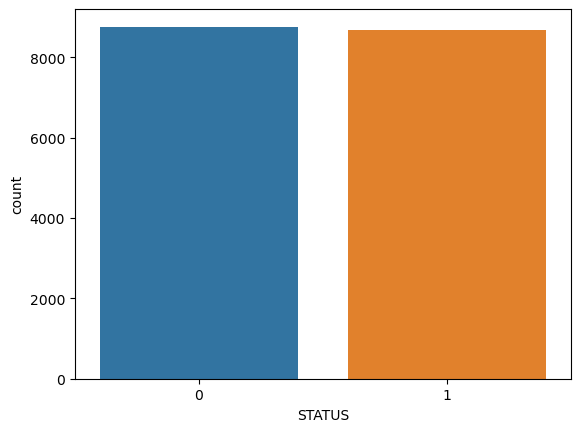

In [60]:
# FIRES EXTINGUISHED
sb.countplot(data=fire_data, x="STATUS")
fire_data['STATUS'].value_counts()

In [61]:
# QUANTITY OF SAMPLES OF EACH CAN SIZE OF GASOLINE  
fire_data['GASOLINE'].value_counts() 

0     12312
7      1026
12     1026
14     1026
16     1026
20     1026
Name: GASOLINE, dtype: int64

In [62]:
# QUANTITY OF SAMPLES OF EACH CAN SIZE OF KEROSENE  
fire_data['KEROSENE'].value_counts() 

0     12312
7      1026
12     1026
14     1026
16     1026
20     1026
Name: KEROSENE, dtype: int64

In [63]:
# QUANTITY OF SAMPLES OF EACH CAN SIZE OF THINNER 
fire_data['THINNER'].value_counts() 

0     12312
7      1026
12     1026
14     1026
16     1026
20     1026
Name: THINNER, dtype: int64

10     918
110    918
180    918
170    918
160    918
150    918
140    918
130    918
120    918
100    918
20     918
90     918
80     918
70     918
60     918
50     918
40     918
30     918
190    918
Name: DISTANCE, dtype: int64

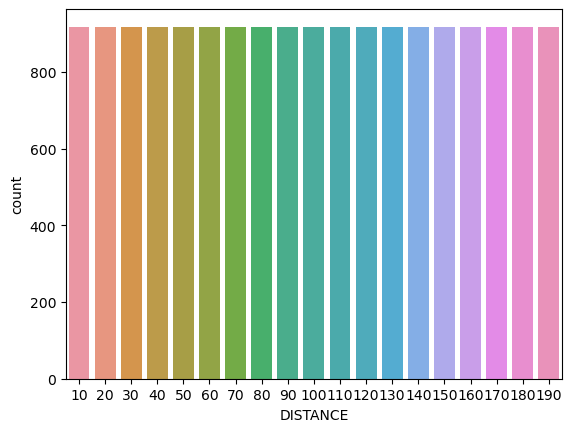

In [64]:
# FUEL USED
sb.countplot(data=fire_data, x="DISTANCE")
fire_data['DISTANCE'].value_counts()

<AxesSubplot:xlabel='DESIBEL', ylabel='Count'>

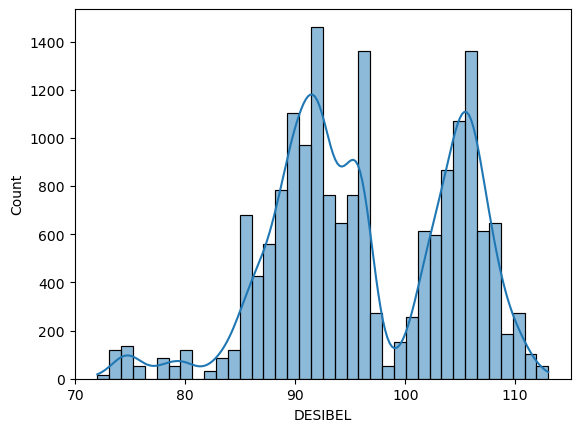

In [65]:
# DISTRIBUTION OF SAMPLES PER DECIBEL LEVEL
showKDE = True # change to see line and bard
sb.histplot(data=fire_data, x="DESIBEL", kde=showKDE)

<AxesSubplot:xlabel='FREQUENCY', ylabel='Count'>

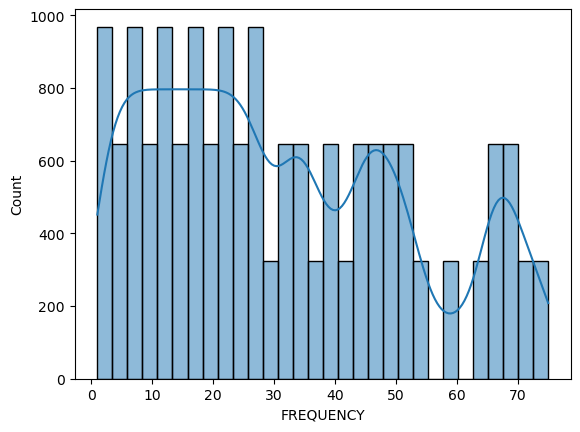

In [66]:
# DISTRIBUTION OF SAMPLES PER FREQUENCY
showKDE = True # change to see line and bard
sb.histplot(data=fire_data, x="FREQUENCY", kde=showKDE)

<AxesSubplot:xlabel='AIRFLOW', ylabel='Count'>

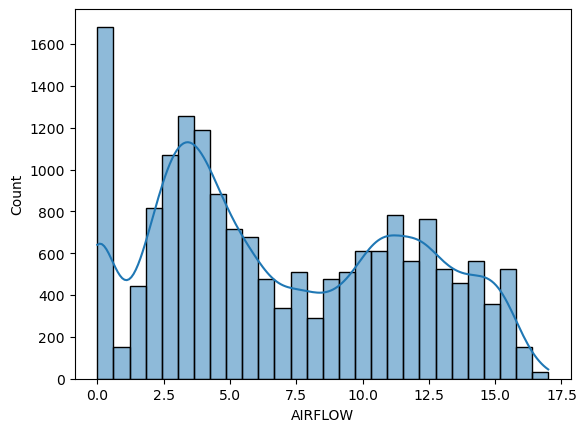

In [67]:
# DISTRIBUTION OF SAMPLES PER AIRFLOW
showKDE = True # change to see line and bard
sb.histplot(data=fire_data, x="AIRFLOW", kde=showKDE)

<AxesSubplot:xlabel='STATUS', ylabel='AIRFLOW'>

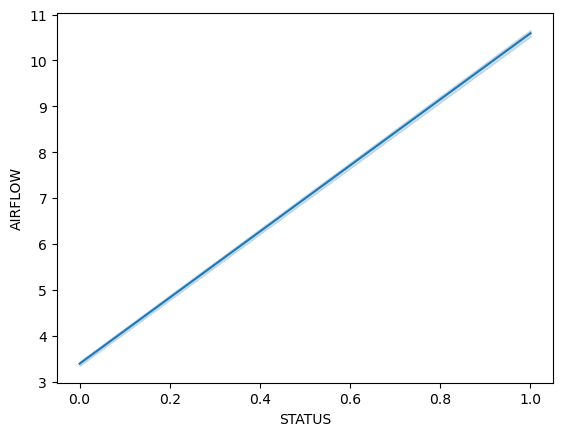

In [68]:
# RELATION BETWEEN STATUS AND AIRFLOW ATTRIBUTES
sb.lineplot(data=fire_data, x="STATUS", y="AIRFLOW")


As can be seen, the higher the airflow the bigger the possibility of the final status being "extiguished".

<AxesSubplot:xlabel='STATUS', ylabel='FREQUENCY'>

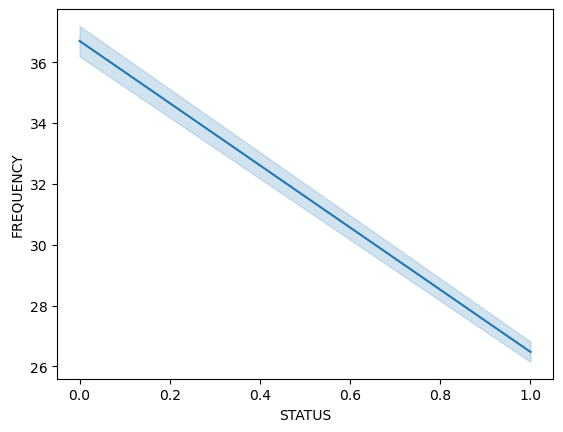

In [69]:
# RELATION BETWEEN STATUS AND FREQUENCY ATTRIBUTES
sb.lineplot(data=fire_data, x="STATUS", y="FREQUENCY")

As can be seen, the lower the frequncy the bigger the possibility of the final status being "extiguished".

<AxesSubplot:xlabel='STATUS', ylabel='DESIBEL'>

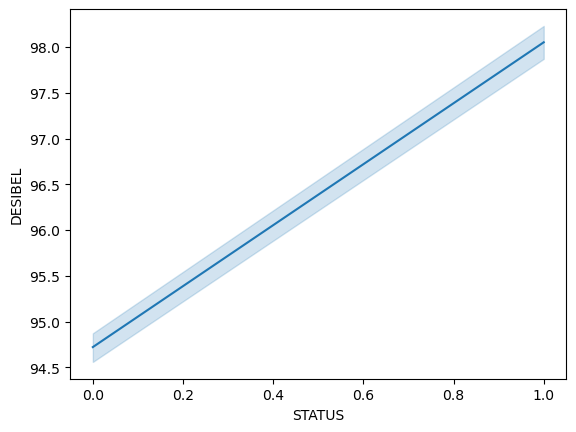

In [70]:
# RELATION BETWEEN STATUS AND DESIBEL ATTRIBUTES
sb.lineplot(data=fire_data, x="STATUS", y="DESIBEL")

As can be seen, the higher the frequency the bigger the possibility of the final status being "extiguished".

<AxesSubplot:xlabel='STATUS', ylabel='AIRFLOW'>

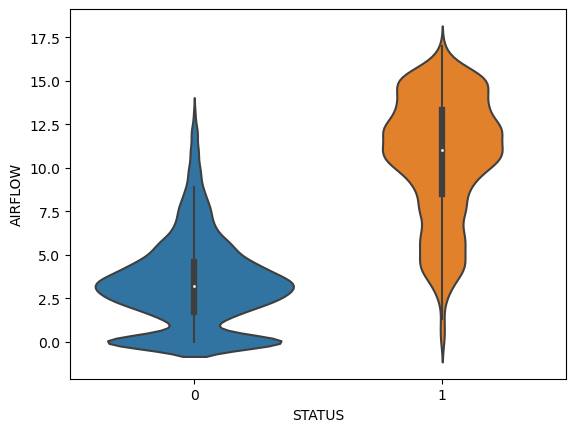

In [71]:
# RELATION BETWEEN STATUS AND AIRFLOW ATTRIBUTES
sb.violinplot(data=fire_data, x="STATUS", y="AIRFLOW")

<AxesSubplot:xlabel='STATUS', ylabel='DESIBEL'>

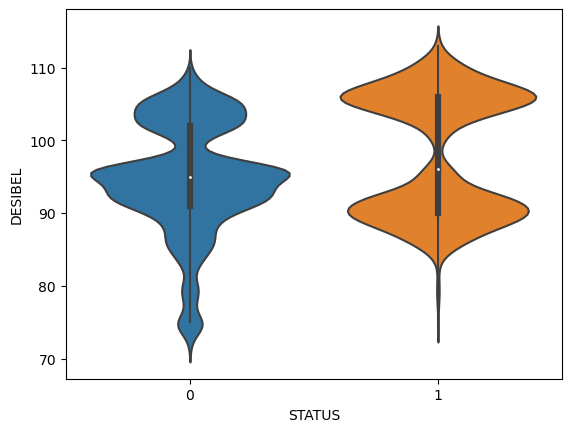

In [72]:
sb.violinplot(data=fire_data, x="STATUS", y="DESIBEL")

<AxesSubplot:xlabel='STATUS', ylabel='FREQUENCY'>

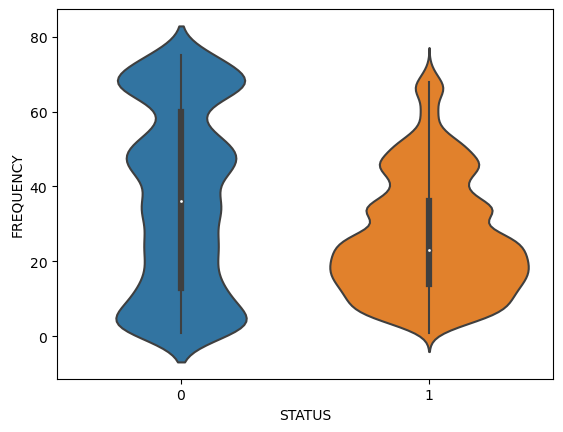

In [73]:
sb.violinplot(x=fire_data["STATUS"], y=fire_data["FREQUENCY"])

<AxesSubplot:xlabel='STATUS', ylabel='DISTANCE'>

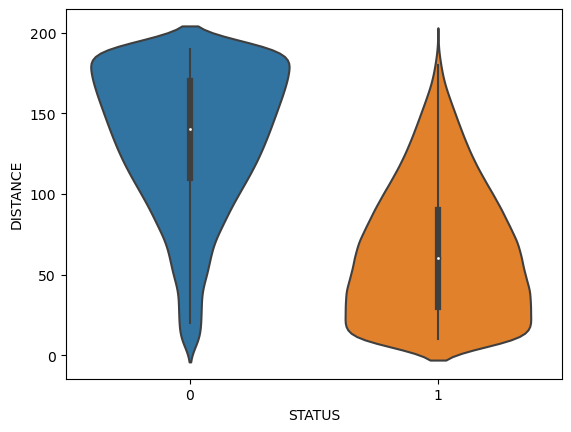

In [74]:
# RELATION BETWEEN STATUS AND DISTANCE ATTRIBUTES
sb.violinplot(x=fire_data["STATUS"], y=fire_data["DISTANCE"])

As can be seen, the shorter the distance the bigger the possibility of the final status being "extiguished".

<AxesSubplot:xlabel='GASOLINE', ylabel='count'>

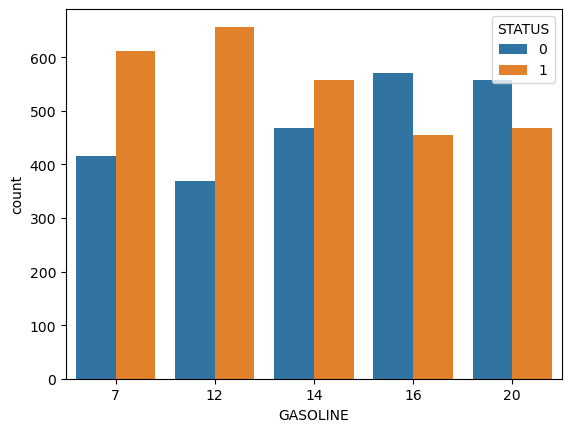

In [75]:
# STATUS RESULT BY GASOLINE CAN SIZE
sb.countplot(data=fire_data[fire_data['GASOLINE'] > 0], x="GASOLINE", hue="STATUS")

<AxesSubplot:xlabel='KEROSENE', ylabel='count'>

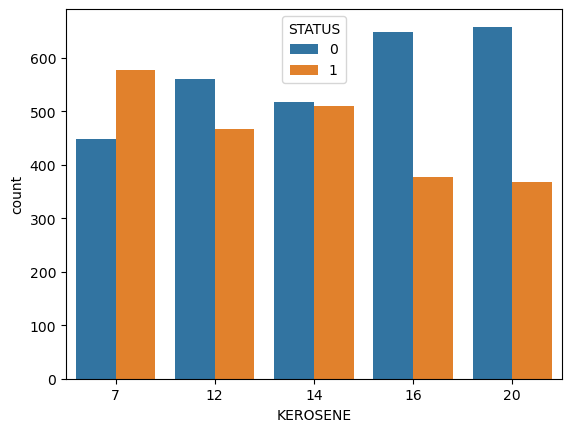

In [76]:
# STATUS RESULT BY KEROSENE CAN SIZE
sb.countplot(data=fire_data[fire_data['KEROSENE'] > 0], x="KEROSENE", hue="STATUS")

<AxesSubplot:xlabel='THINNER', ylabel='count'>

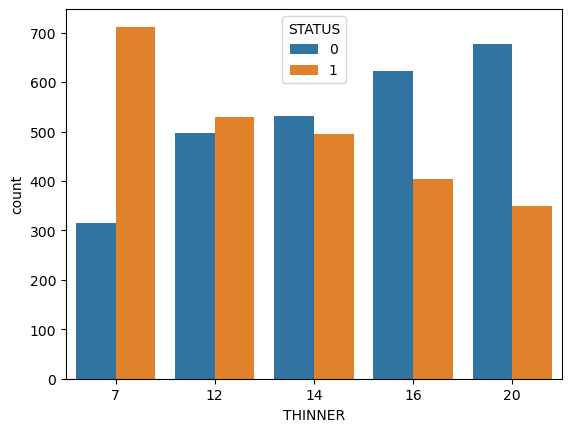

In [77]:
# STATUS RESULT BY THINNER CAN SIZE
sb.countplot(data=fire_data[fire_data['THINNER'] > 0], x="THINNER", hue="STATUS")

As can be seen, the smaller the can the bigger the possibility of the final status being "extinguished"

<AxesSubplot:xlabel='LPG', ylabel='count'>

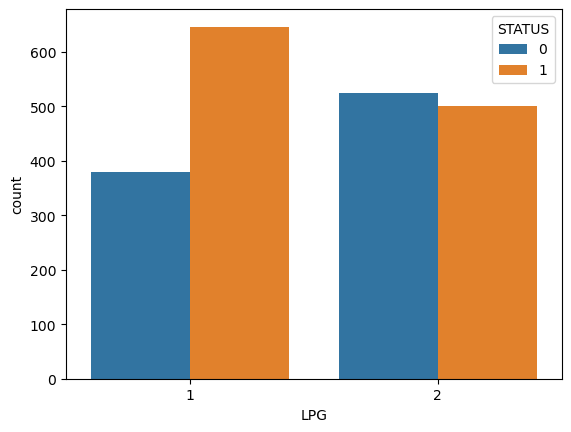

In [78]:
# STATUS RESULT BY OPENING OF THE LPG VALVE
sb.countplot(data=fire_data[fire_data['LPG'] > 0], x="LPG", hue="STATUS")

As can be seen, the smaller the opening the bigger the possibility of the final status being "extinguished"

<AxesSubplot:xlabel='DISTANCE', ylabel='FREQUENCY'>

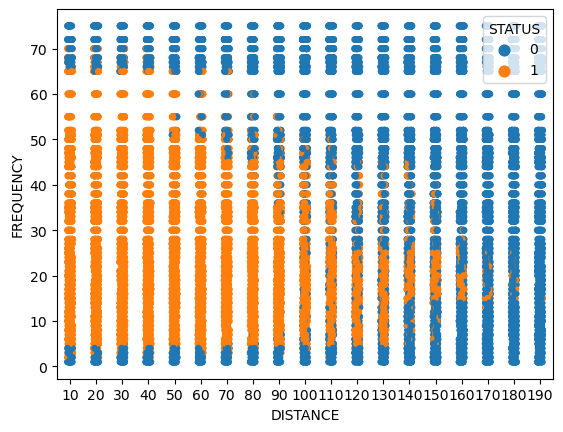

In [79]:
# STATUS RESULT BY FREQUENCY AND DISTANCE
sb.stripplot(data=fire_data, x="DISTANCE", y="FREQUENCY", hue="STATUS")

<AxesSubplot:xlabel='GASOLINE', ylabel='DISTANCE'>

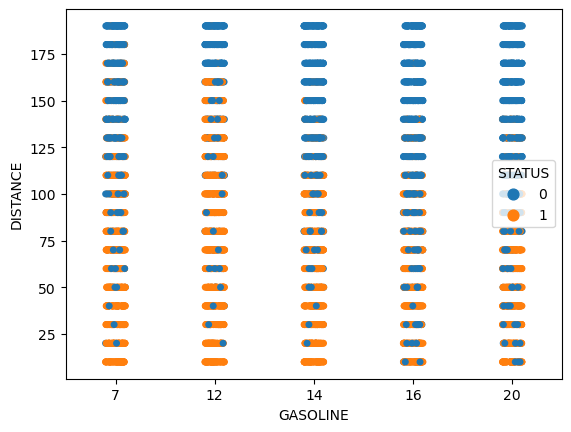

In [80]:
# STATUS RESULT BY GASOLINE CAN SIZE AND DISTANCE
sb.stripplot(data=fire_data[fire_data['GASOLINE'] > 0], x="GASOLINE", y="DISTANCE", hue="STATUS")

<AxesSubplot:xlabel='KEROSENE', ylabel='DISTANCE'>

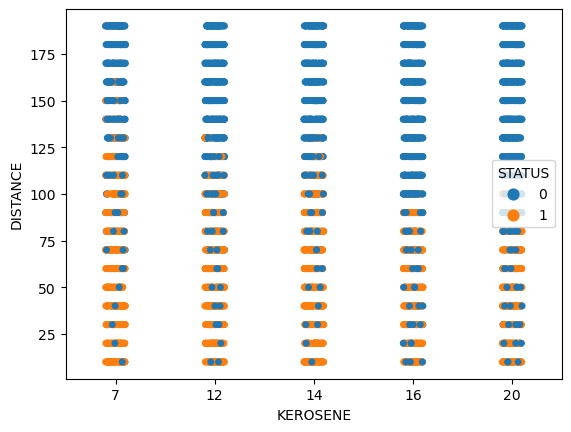

In [81]:
# STATUS RESULT BY KEROSEN CAN SIZE AND DISTANCE
sb.stripplot(data=fire_data[fire_data['KEROSENE'] > 0], x="KEROSENE", y="DISTANCE", hue="STATUS")

<AxesSubplot:xlabel='THINNER', ylabel='DISTANCE'>

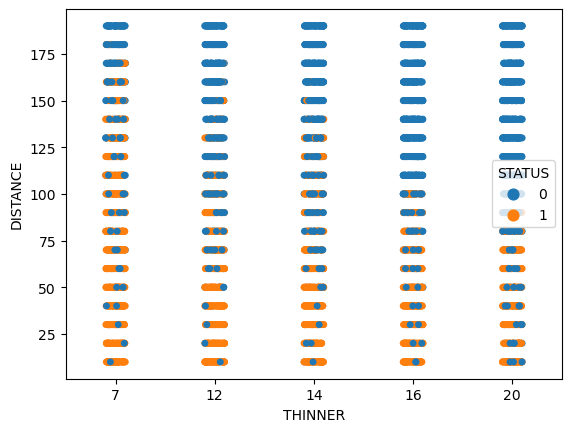

In [82]:
# STATUS RESULT BY THINNER CAN SIZE AND DISTANCE
sb.stripplot(data=fire_data[fire_data['THINNER'] > 0], x="THINNER", y="DISTANCE", hue="STATUS")

<AxesSubplot:xlabel='LPG', ylabel='DISTANCE'>

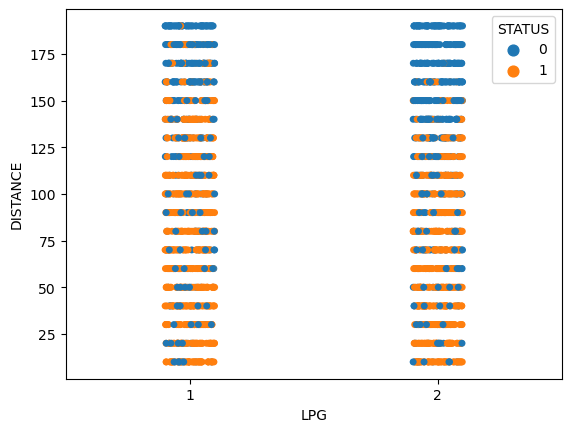

In [83]:
# STATUS RESULT BY OPENNING SIZE OF LPG VALVE AND DISTANCE
sb.stripplot(data=fire_data[fire_data['LPG'] > 0], x="LPG", y="DISTANCE", hue="STATUS")

In [84]:
#sb.pairplot(fire_data,hue='STATUS')

<AxesSubplot:>

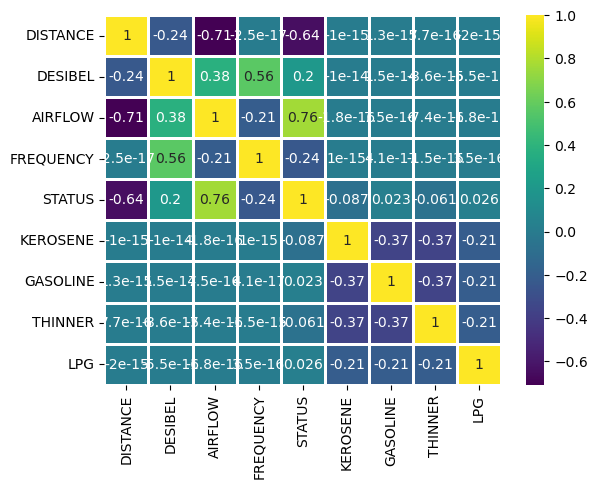

In [85]:
# HEATHMAP SHOWING CORRELATION BETWEEN ATTRIBUTES
sb.heatmap(fire_data.corr(),annot=True,cmap='viridis',linewidths=2)


As can be seen, status is heavily linked with airflow, frequency and distance, being directly proportional to airflow and inversionaly proportional to frequency and distance. Airflow seems to be the most relevant attribute to status determination.

In [86]:
# ATTRIBUTES THAT CORRELATE THE MOST WITH STATUS
np.abs(fire_data.corr()['STATUS']).sort_values().tail(4)

FREQUENCY    0.244203
DISTANCE     0.644051
AIRFLOW      0.760628
STATUS       1.000000
Name: STATUS, dtype: float64

In [87]:
#Data Modelling 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X=fire_data.drop(['STATUS'],axis=1)
y=fire_data['STATUS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [88]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)

In [89]:
confusion_matrix(y_test,y_pred)

array([[2545,   81],
       [  84, 2523]], dtype=int64)

In [90]:
decision_trees_accuracy = accuracy_score(y_test,y_pred)
print(decision_trees_accuracy)

0.9684693292566405


In [91]:
#SVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test)  


In [92]:
confusion_matrix(y_test,y_pred)

array([[2396,  230],
       [ 287, 2320]], dtype=int64)

In [93]:
svc_accuracy = accuracy_score(y_test,y_pred)
print(svc_accuracy)

0.9012038983374737


In [94]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))

k_nn_accuracy = accuracy_score(y_test,y_pred)
print(k_nn_accuracy)

[[2525  101]
 [ 105 2502]]
0.9606344353143512


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [95]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

print(confusion_matrix(y_test,y_pred))

naive_bayes_accuracy = accuracy_score(y_test,y_pred)
print(naive_bayes_accuracy)

[[2408  218]
 [ 410 2197]]
0.8799923562010319


In [96]:
#Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()
classifier2.fit(X_train,y_train)

y_pred.shape

print(confusion_matrix(y_test,y_pred))

random_forest_accuracy = accuracy_score(y_test,y_pred)
print(random_forest_accuracy)

[[2408  218]
 [ 410 2197]]
0.8799923562010319


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

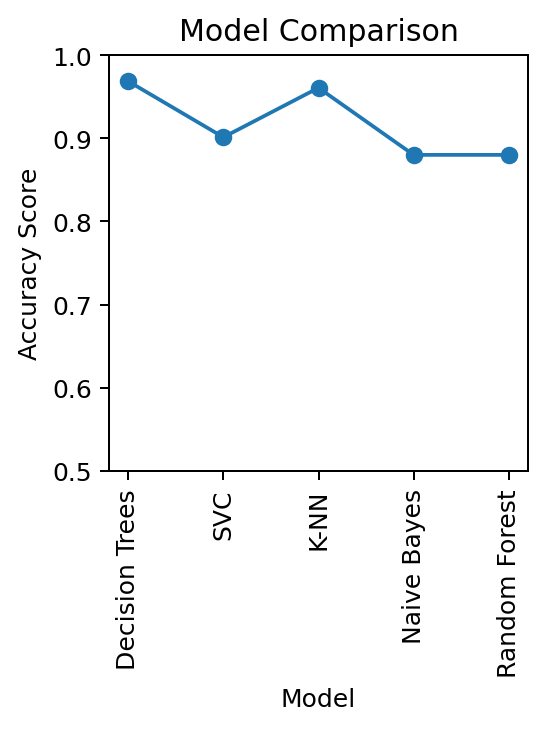

In [97]:
models = ['Decision Trees','SVC','K-NN','Naive Bayes','Random Forest']
score = [decision_trees_accuracy,svc_accuracy,k_nn_accuracy,naive_bayes_accuracy,random_forest_accuracy]

plt.figure(figsize=(3,3),dpi=180)
plt.plot(models,score,marker='o')
plt.ylim(0.5,1)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=90)

Out of the used algorithms, Naive Bayes and Random Forest performed the worse, obtaining a similar accuracy of 87.999%.
To note that in this case there was a relatively higher number of false negatives, those being almost the double of the false positives, making it a fairly pessimistic prediction. 

SVC, K-NN and Decision Trees obtained the best accuracy scores, with SVC scoring 90.120%, K-NN being a close second scoring 96.063% and Decision Trees being the most successful one scoring 96.770%.
In all these algorithms the number of false negatives and false positives were fairly similar, with the firsts being always slightly higher, thus keeping the tone of a pessimist prediction.
